In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_samples = 100
age = np.random.randint(20, 70, size=n_samples)
area = np.random.randint(500, 3000, size=n_samples)
bedroom = np.random.randint(1, 6, size=n_samples)
price = 10000 + 200 * age + 50 * area + 5000 * bedroom + np.random.normal(0, 5000, size=n_samples)

# Create a DataFrame
df = pd.DataFrame({'age': age, 'area': area, 'bedroom': bedroom, 'price': price})

# Save the DataFrame to an Excel file
df.to_excel('roomprice.xlsx', index=False)#this creates excel file


Correlation between AGE and Price: 0.12
Mean Squared Error for AGE: 959922810.75

Correlation between AREA and Price: 0.96
Mean Squared Error for AREA: 72814135.05

Correlation between BEDROOM and Price: 0.16
Mean Squared Error for BEDROOM: 949667140.17


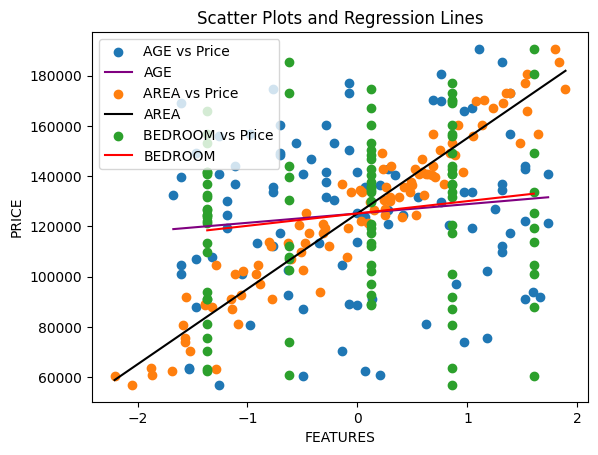

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def perform_regression_plot(ax, x, y, feature_name, line_color):
    # Normalize the feature
    scaler = StandardScaler()
    x_normalized = scaler.fit_transform(x)

    # Initialize and fit the Linear Regression model
    SLR = LinearRegression()
    SLR.fit(x_normalized, y)

    # Predict prices using the trained model
    pred = SLR.predict(x_normalized)

    # Concatenate the feature and target DataFrames horizontally
    data = pd.concat([x, y], axis=1)

    # Calculate correlation coefficients
    correlation = data.corr()

    # Print correlation coefficients
    print(f"\nCorrelation between {feature_name} and Price: {correlation.iloc[0, 1]:.2f}")

    # Calculate Mean Squared Error
    mse = mean_squared_error(y, pred)
    print(f"Mean Squared Error for {feature_name}: {mse:.2f}")

    # Scatter plot
    ax.scatter(x_normalized, y, label=f'{feature_name} vs Price')

    # Plot the regression line
    sorted_indices = np.argsort(x_normalized.flatten())
    ax.plot(x_normalized[sorted_indices], pred[sorted_indices], color=line_color, label=feature_name)
    ax.set_xlabel('FEATURES')
    ax.set_ylabel('PRICE')

# Read the Excel file into a DataFrame
df = pd.read_excel('roomprice.xlsx')

# Extract features (x) and target (y) variables
x_age = df[['age']]
x_area = df[['area']]
x_bedroom = df[['bedroom']]
y = df['price']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Perform regression and plot for each feature with different line colors
perform_regression_plot(ax, x_age, y, 'AGE', 'purple')
perform_regression_plot(ax, x_area, y, 'AREA', 'black')
perform_regression_plot(ax, x_bedroom, y, 'BEDROOM', 'red')

ax.legend()
plt.title('Scatter Plots and Regression Lines')
plt.show()